In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data = pd.read_csv("Section 1 data.csv")
data.head(5)

,Review_Date,Review_Text,User_ID,Business_ID,Business_Name,Business_Category,City,State,Latitude,Longitude,Avg_Business_Star_Rating
0,2014-07-16,okay...so so,6VxJJX7h36bMCCFt7URg6w,9QqLqYIwV-n1BJPjnaYv8A,Beef 'O' Brady's,Bars,Chandler,AZ,33.303847,-111.946838,3.5
1,2014-07-16,Some people complain about the prices but Subw...,viGPiPuMZnV4PR_aiA3-qw,pNQwnY_q4okdlnPiR-3RBA,Empire Bagels,Food,Las Vegas,NV,36.077299,-115.297979,3.5
2,2014-07-16,"Had red curry chicken, the chicken itself was ...",rwehMCinfBjhZ0IbR1zFBw,shCdCHRbnY5FTMJbWl-myQ,Thai Spices,Thai,Mesa,AZ,33.412708,-111.875803,4.0
3,2014-07-16,"Alright, I gave the restaurant manager ample t...",VWqt5IH8fm-k9M0CKFkJzg,HpaYCM_NCauI72LLXxC6SA,Yonaka Modern Japanese,Tapas/Small Plates,Las Vegas,NV,36.114935,-115.209737,4.5
4,2014-07-16,Blehhhh :/ this place shouldn't even be in bus...,Y6-0ToMhjBsm8iYEaT2meg,FC4q3hJyF8oo984xoo3RMg,808 Sushi,Sushi Bars,Las Vegas,NV,36.052181,-115.279227,3.5


In [3]:
data.shape

(227581, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227581 entries, 0 to 227580
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Review_Date               227581 non-null  object 
 1   Review_Text               227580 non-null  object 
 2   User_ID                   227581 non-null  object 
 3   Business_ID               227581 non-null  object 
 4   Business_Name             227581 non-null  object 
 5   Business_Category         227297 non-null  object 
 6   City                      227581 non-null  object 
 7   State                     227581 non-null  object 
 8   Latitude                  227581 non-null  float64
 9   Longitude                 227581 non-null  float64
 10  Avg_Business_Star_Rating  227581 non-null  float64
dtypes: float64(3), object(8)
memory usage: 19.1+ MB


In [5]:
data.dtypes

Review_Date                  object
Review_Text                  object
User_ID                      object
Business_ID                  object
Business_Name                object
Business_Category            object
City                         object
State                        object
Latitude                    float64
Longitude                   float64
Avg_Business_Star_Rating    float64
dtype: object

In [6]:
data.columns

Index(['Review_Date', 'Review_Text', 'User_ID', 'Business_ID', 'Business_Name',
       'Business_Category', 'City', 'State', 'Latitude', 'Longitude',
       'Avg_Business_Star_Rating'],
      dtype='object')

In [7]:
data.isnull().sum()

Review_Date                   0
Review_Text                   1
User_ID                       0
Business_ID                   0
Business_Name                 0
Business_Category           284
City                          0
State                         0
Latitude                      0
Longitude                     0
Avg_Business_Star_Rating      0
dtype: int64

In [8]:
df = data.copy()

In [9]:
df.Business_Category.value_counts()

Business_Category
Food                  21015
Bars                  13551
Hotels & Travel       13195
Mexican                9993
Breakfast & Brunch     8193
                      ...  
Pool Cleaners             1
Bartenders                1
Hospice                   1
Speech Therapists         1
Religious Schools         1
Name: count, Length: 372, dtype: int64

In [10]:
name_city = df[df.Business_Category.isna()==True][['Business_Name', 'City']]
name_city

,Business_Name,City
306,Top Leaf Tree Service,Mesa
605,Southwest Airlines,Phoenix
1622,Ross Stores,Phoenix
1753,Gilbert Mail,Gilbert
1759,Truckstop Holt's Shell,Gila Bend
...,...,...
224503,Magoo's,Las Vegas
224736,Amalfi,Las Vegas
225915,Torrid,Las Vegas
226062,Umc Quick Care,Henderson


In [11]:
for i in name_city.Business_Name.unique():
    city = name_city.City[name_city.Business_Name==i].iloc[0]
    na = (df.Business_Name==i) & (df.Business_Category.isna()==True) & (df.City==city)
    not_na = (df.Business_Name==i) & (df.Business_Category.isna()==False) & (df.City==city)
    unique_cat = df.loc[not_na, 'Business_Category'].unique()
    if unique_cat.size > 0:  # Check if there are any non-NA values
        df.loc[na, 'Business_Category'] = unique_cat[0]

In [12]:
df.isnull().sum()

Review_Date                   0
Review_Text                   1
User_ID                       0
Business_ID                   0
Business_Name                 0
Business_Category           269
City                          0
State                         0
Latitude                      0
Longitude                     0
Avg_Business_Star_Rating      0
dtype: int64

In [13]:
df = df.dropna(subset=['Business_Category', 'Review_Text'])

In [14]:
df.Review_Date = pd.to_datetime(df.Review_Date)

### 1.	How many unique restaurants could be found in this data set? 

In [16]:
rest_df = df[df.Business_Category=='Restaurants']

len(rest_df.Business_ID.unique())


594

### 2.	Which restaurant received the highest number of reviews? What about percentage-wise?  

In [18]:
val_count = rest_df.Business_ID.value_counts()

rest= val_count[val_count==val_count.iloc[0]].index[0]
rest_name = rest_df[rest_df.Business_ID==rest].Business_Name.unique()[0]
print('Restaurant', rest_name)

# With percentage

perc =  val_count.iloc[0] /  rest_df.shape[0]
print('Percentage', perc)



Restaurant LAVO Italian Restaurant & Lounge
Percentage 0.030861354214647627


### 3.	Which cities have got at least one 5-star review in Nevada (NV) state? 

In [20]:
df[(df.State=='NV') & (df.Avg_Business_Star_Rating==5)].City.unique()

array(['Las Vegas', 'Henderson', 'Boulder City', 'Nellis'], dtype=object)

### 4.	Which city has the highest number of reviews in the Business Category of “Hotels & Travel”? What about percentage-wise?  

In [22]:
val_c = df[(df.Business_Category=='Hotels & Travel')].City.value_counts()
city = val_c[val_c==val_c.iloc[0]].index[0]
print('City: ', city)

# with percentage

perc_rew = val_c.iloc[0] / df[(df.Business_Category=='Hotels & Travel')].shape[0]
print('Percentage: ', perc_rew)

City:  Las Vegas
Percentage:  0.7763716277659897


### 5.	At what day of the week people are more likely to post their reviews? 

In [24]:
df['Week_Day'] = df.Review_Date.apply(lambda x: datetime.strftime(x,"%A"))
week_count = df.Week_Day.value_counts()

day = week_count[week_count==week_count.iloc[0]].index[0]

print(week_count)
print('\nDay: ', day)

Week_Day
Monday       36398
Tuesday      34227
Wednesday    34125
Sunday       32856
Thursday     30629
Saturday     29539
Friday       29537
Name: count, dtype: int64

Day:  Monday


### 6.	Showcase if there are any trends regarding restaurant performance as time goes by. 

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from calendar import month_name

rest_df = df[df.Business_Category=='Restaurants']


rest_df['Month'] = rest_df.Review_Date.apply(lambda x: datetime.strftime(x, '%B'))
rest_df['Year'] = rest_df.Review_Date.apply(lambda x: datetime.strftime(x, '%Y'))

month_lookup = list(month_name)[1:]

rest_df['Month'] = pd.Categorical(rest_df['Month'], categories=month_lookup, ordered=True)
rest_df['Year'] = pd.Categorical(rest_df['Year'], categories=sorted(rest_df['Year'].unique()), ordered=True)

rest_df = rest_df.sort_values(by=['Year','Month'])


C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\2893522409.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_df['Month'] = rest_df.Review_Date.apply(lambda x: datetime.strftime(x, '%B'))
C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\2893522409.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_df['Year'] = rest_df.Review_Date.apply(lambda x: datetime.strftime(x, '%Y'))
C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\2893522409.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [27]:
df4 = rest_df[['Review_Date', 'Avg_Business_Star_Rating']].reset_index()
df4.drop(['index'], axis=1, inplace=True)
df4

,Review_Date,Avg_Business_Star_Rating
0,2005-10-27,3.5
1,2005-10-21,2.5
2,2005-10-11,4.0
3,2005-12-10,3.5
4,2006-01-11,4.0
...,...,...
6508,2014-07-01,3.5
6509,2014-07-01,4.0
6510,2014-07-01,4.0
6511,2014-07-01,3.5


<Axes: >

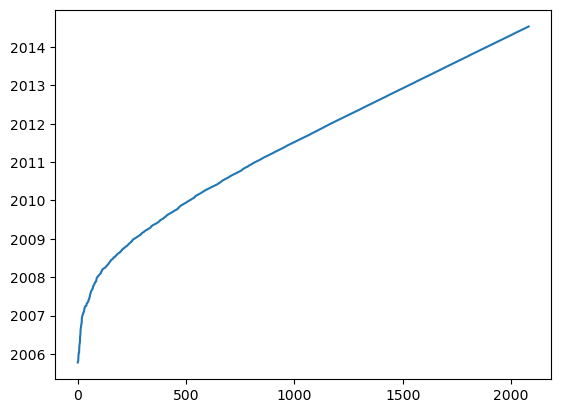

In [28]:
df4 = df4.sort_values('Review_Date')

df4 = df4.groupby(['Review_Date']).sum().reset_index()

df4["Review_Date"].plot()

In [29]:
group_month = rest_df.groupby(['Month'])['Avg_Business_Star_Rating'].mean().reset_index()
group_month


C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\1586313643.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_month = rest_df.groupby(['Month'])['Avg_Business_Star_Rating'].mean().reset_index()


,Month,Avg_Business_Star_Rating
0,January,3.662712
1,February,3.692008
2,March,3.672881
3,April,3.694167
4,May,3.641176
5,June,3.653716
6,July,3.669628
7,August,3.663760
8,September,3.610491
9,October,3.627572


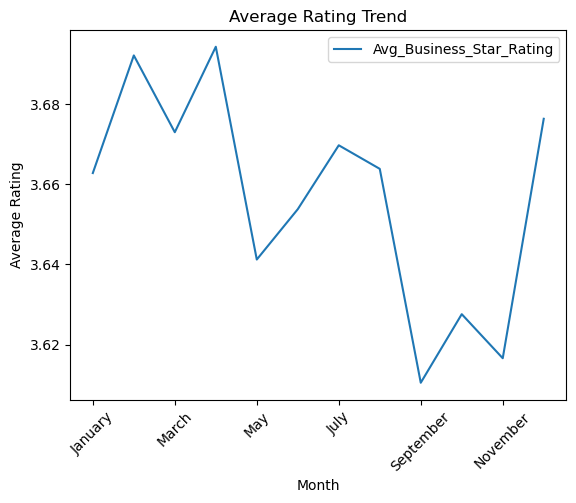

In [30]:
group_month.plot(x='Month', y='Avg_Business_Star_Rating', kind='line', title='Average Rating Trend')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [31]:
group_year = rest_df.groupby(['Year'])['Avg_Business_Star_Rating'].mean().reset_index()
group_year

C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\2042710415.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_year = rest_df.groupby(['Year'])['Avg_Business_Star_Rating'].mean().reset_index()


,Year,Avg_Business_Star_Rating
0,2005,3.375000
1,2006,3.575000
2,2007,3.481928
3,2008,3.553360
4,2009,3.633117
5,2010,3.613636
6,2011,3.641771
7,2012,3.654583
8,2013,3.688378
9,2014,3.719075


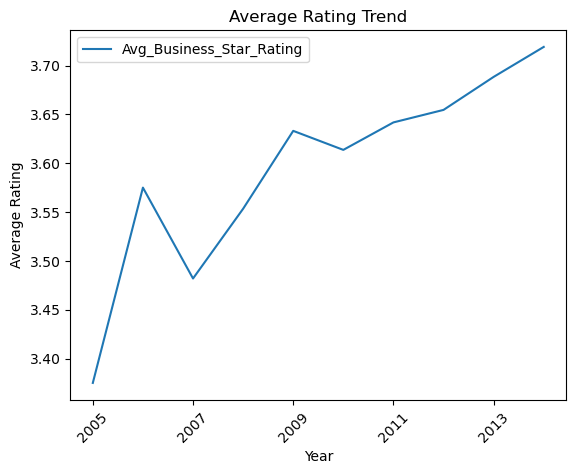

In [32]:
group_year.plot(x='Year', y='Avg_Business_Star_Rating', kind='line', title='Average Rating Trend')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\3404380848.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_month1 = rest_df[rest_df.Year==i].groupby(['Month'])['Avg_Business_Star_Rating'].mean().reset_index()


Year 2005


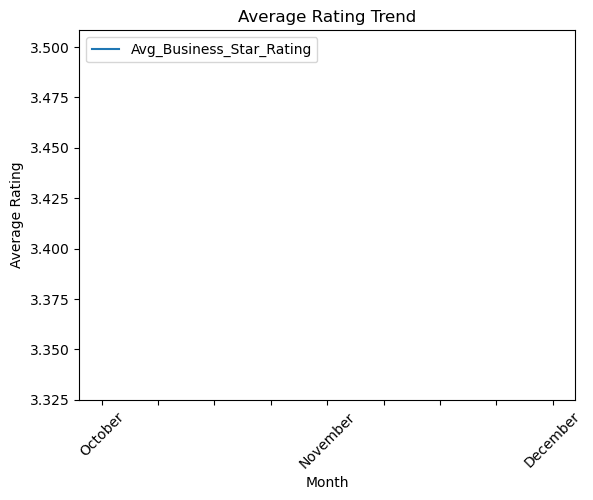

Year 2006


C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\3404380848.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_month1 = rest_df[rest_df.Year==i].groupby(['Month'])['Avg_Business_Star_Rating'].mean().reset_index()


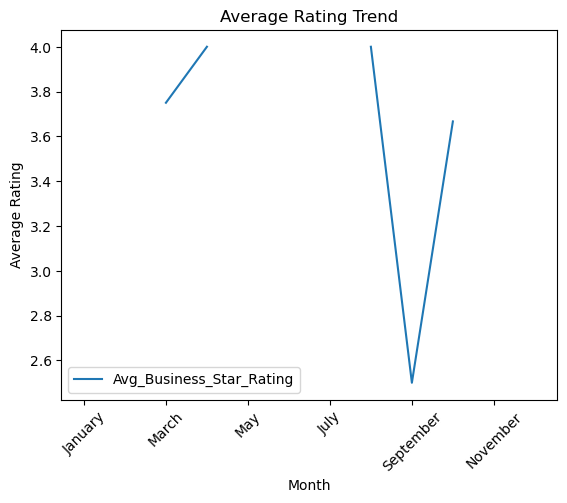

Year 2007


C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\3404380848.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_month1 = rest_df[rest_df.Year==i].groupby(['Month'])['Avg_Business_Star_Rating'].mean().reset_index()


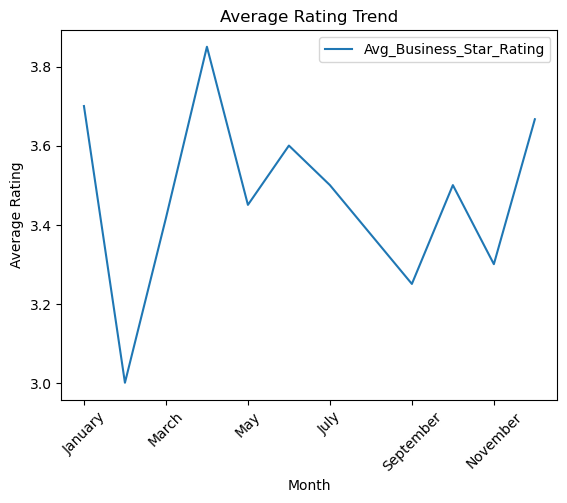

Year 2008


C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\3404380848.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_month1 = rest_df[rest_df.Year==i].groupby(['Month'])['Avg_Business_Star_Rating'].mean().reset_index()


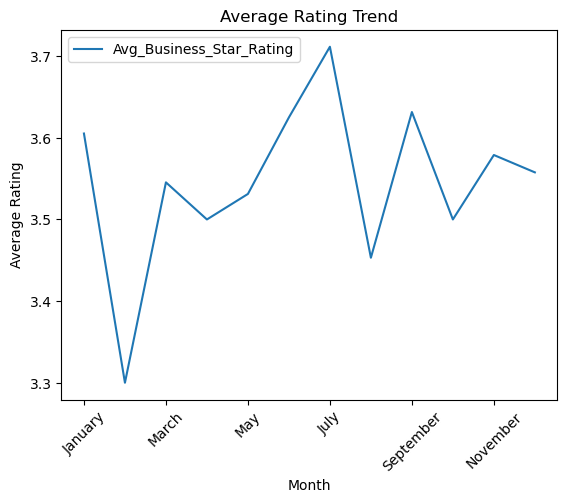

Year 2009


C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\3404380848.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_month1 = rest_df[rest_df.Year==i].groupby(['Month'])['Avg_Business_Star_Rating'].mean().reset_index()


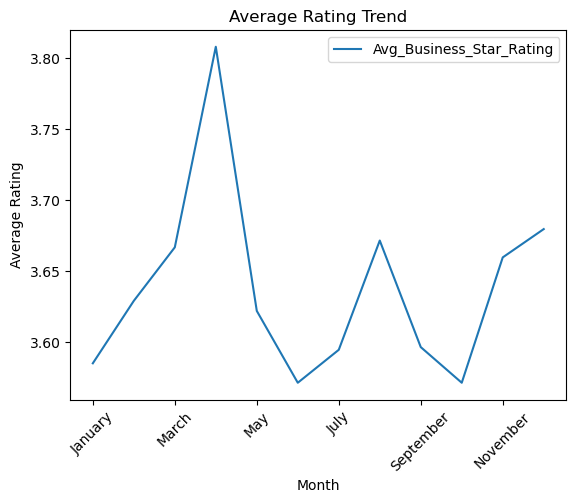

Year 2010


C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\3404380848.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_month1 = rest_df[rest_df.Year==i].groupby(['Month'])['Avg_Business_Star_Rating'].mean().reset_index()


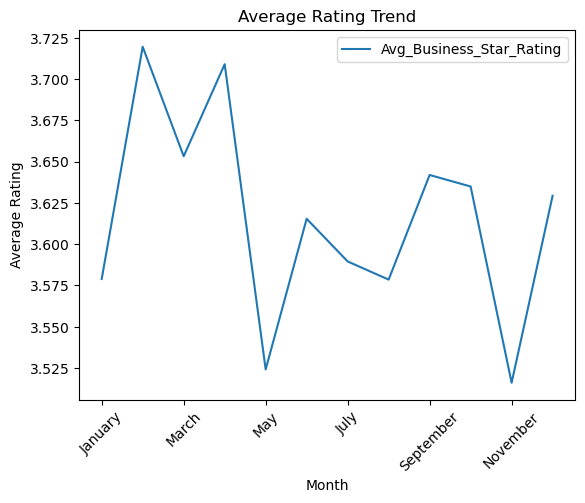

Year 2011


C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\3404380848.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_month1 = rest_df[rest_df.Year==i].groupby(['Month'])['Avg_Business_Star_Rating'].mean().reset_index()


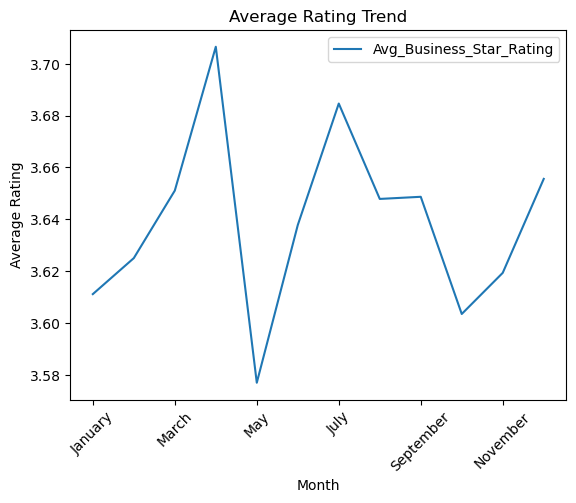

Year 2012


C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\3404380848.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_month1 = rest_df[rest_df.Year==i].groupby(['Month'])['Avg_Business_Star_Rating'].mean().reset_index()


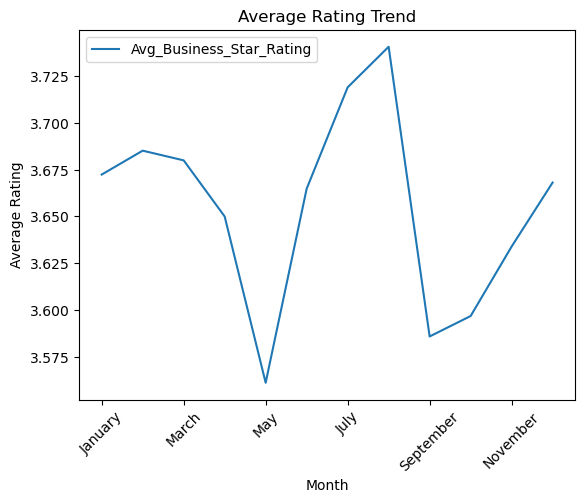

Year 2013


C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\3404380848.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_month1 = rest_df[rest_df.Year==i].groupby(['Month'])['Avg_Business_Star_Rating'].mean().reset_index()


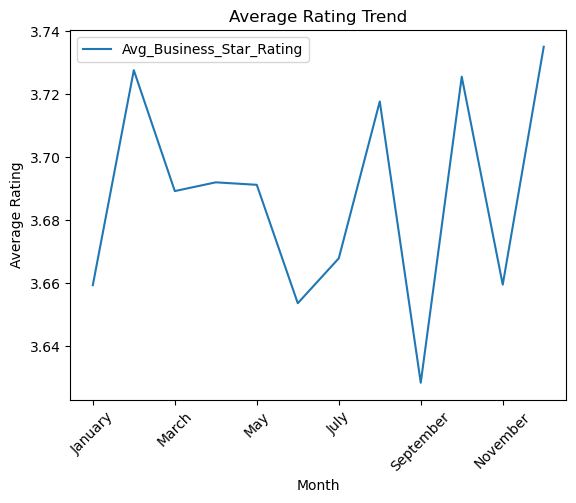

Year 2014


C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\3404380848.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_month1 = rest_df[rest_df.Year==i].groupby(['Month'])['Avg_Business_Star_Rating'].mean().reset_index()


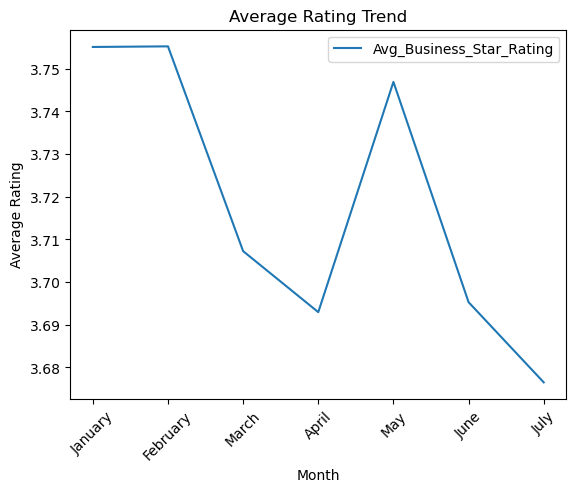

In [33]:
for i in rest_df.Year.unique():
    print('Year', i)
    group_month1 = rest_df[rest_df.Year==i].groupby(['Month'])['Avg_Business_Star_Rating'].mean().reset_index()
    group_month1.plot(x='Month', y='Avg_Business_Star_Rating', kind='line', title='Average Rating Trend')
    plt.xlabel('Month')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.savefig(f'average_rating_trend{i}.png', dpi=300)
    plt.show()


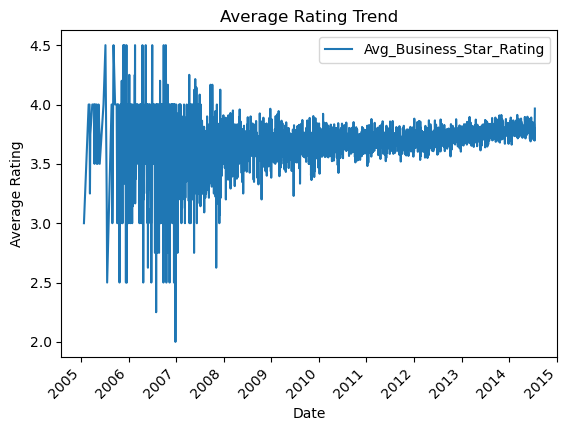

In [34]:
df6 = df.groupby(['Review_Date'])['Avg_Business_Star_Rating'].mean().reset_index()
df6.plot(x='Review_Date', y='Avg_Business_Star_Rating', kind='line', title='Average Rating Trend')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

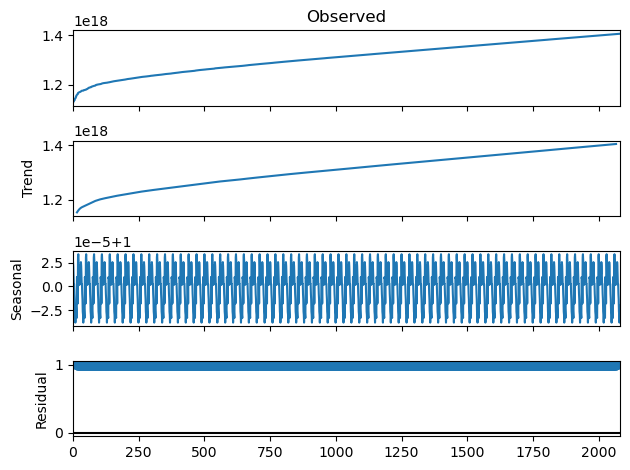

In [35]:
import statsmodels.api as sn

multiplicative_model = sn.tsa.seasonal_decompose(df4['Review_Date'].values, period=30, model = "multiplicative")


fig = multiplicative_model.plot()

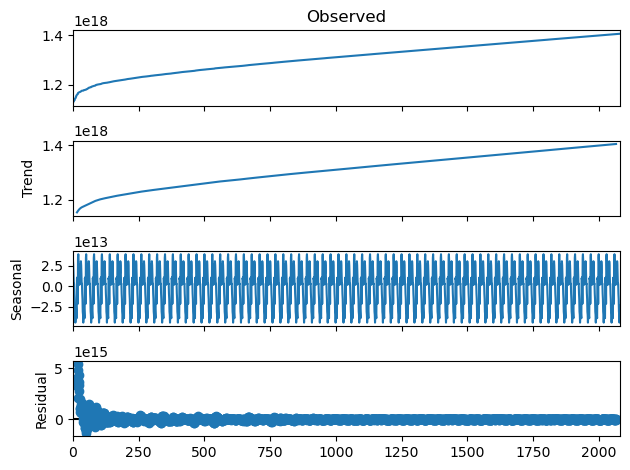

In [36]:
import statsmodels.api as sn

additive_model = sn.tsa.seasonal_decompose(df4['Review_Date'].values, period=30, model = "additive")


fig = additive_model.plot()

In [37]:
### Multiplicative model is best choice for dataset

### 7.	Based on analyzed data showcase if there are any steps that the restaurant can take to improve their public appeal.   

##### In low rating months to identify potential causes restaurants can gather reviews from customers.
##### Restaurants can regularly analyze reviews if they do some changes for imporovement. It can help to identify affect of these changes. 
##### Maybe restaurants can do some discounts in months which have low rating (specially in September, November)

### 8.	Bonus Question – Based on this data set which user had the highest cumulative travel distance? What distance has been covered by him/her?

In [41]:
df.User_ID.value_counts()

User_ID
kGgAARL2UmvCcTRfiscjug    286
ikm0UCahtK34LbLCEw4YTw    240
glRXVWWD6x1EZKfjJawTOg    219
Iu3Jo9ROp2IWC9FwtWOaUQ    213
PV5voYSD43Cn_3gHmxG7DA    198
                         ... 
5--cDbfDam5mRs-ngGDpRg      1
_X8TgXxSz-n19xiQ5ACIPQ      1
u-AnkjvFgPQjVFiXcfv40g      1
2s-Y1A1G69MmMU1ENmlixA      1
XR4cWlqS9qC25GMnNz0zlw      1
Name: count, Length: 100603, dtype: int64

In [42]:
from geopy.distance import geodesic

df1 = df[["Review_Date","User_ID","Latitude","Longitude"]]

df1["Date"]=pd.to_datetime(df1.Review_Date)

df1 = df1.sort_values(by=['User_ID', 'Date'])

def calc_cum_dist(user):
    cum_dist = [0]
    for i in range(1, len(user)):
        start = (user.iloc[i-1]['Latitude'], user.iloc[i-1]['Longitude'])
        end = (user.iloc[i]['Latitude'], user.iloc[i]['Longitude'])
        dist = geodesic(start, end).kilometers   # with km
        cum_dist.append(cum_dist[-1] + dist)
    user['Cumulative_Dist'] = cum_dist
    return user


df2 = df1.groupby('User_ID').apply(calc_cum_dist)

df2  


C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\1466804173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Date"]=pd.to_datetime(df1.Review_Date)
C:\Users\Hp\AppData\Local\Temp\ipykernel_7300\1466804173.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2 = df1.groupby('User_ID').apply(calc_cum_dist)


Review_Date                 User_ID   Latitude  \
User_ID                                                                        
--2QZsyXGz1OhiD4-0FQLQ 16333   2014-05-06  --2QZsyXGz1OhiD4-0FQLQ  36.131444   
--4fX3LBeXoE88gDTK6TKQ 90957   2013-03-12  --4fX3LBeXoE88gDTK6TKQ  36.168678   
                       72666   2013-07-09  --4fX3LBeXoE88gDTK6TKQ  36.169326   
--65q1FpAL_UQtVZ2PTGew 197148  2010-04-08  --65q1FpAL_UQtVZ2PTGew  33.621210   
                       195774  2010-04-30  --65q1FpAL_UQtVZ2PTGew  33.583480   
...                                   ...                     ...        ...   
zzoe0-0JkltGZbQMdZ8x4w 35142   2014-02-09  zzoe0-0JkltGZbQMdZ8x4w  36.067213   
zztT9KKp0rmJRMeMl4CqzQ 132164  2012-04-06  zztT9KKp0rmJRMeMl4CqzQ  33.493004   
                       132197  2012-04-06  zztT9KKp0rmJRMeMl4CqzQ  33.491618   
zzvflqB4xAcKFbIbS6HSOw 69563   2013-07-28  zzvflqB4xAcKFbIbS6HSOw  36.115551   
                       69690   2013-07-28  zzvflqB4xAcKFbIbS6HSOw  36.115634   

                                Longitude       Date  Cumulative_Dist  
User_ID                                                                
--2QZsyXGz1OhiD4-0FQLQ 16333  -115.164886 2014-05-06         0.000000  
--4fX3LBeXoE88gDTK6TKQ 90957  -115.139802 2013-03-12         0.000000  
                       72666  -115.140097 2013-07-09         0.076710  
--65q1FpAL_UQtVZ2PTGew 197148 -112.003030 2010-04-08         0.000000  
                       195774 -111.883526 2010-04-30        11.854739  
...                                   ...        ...              ...  
zzoe0-0JkltGZbQMdZ8x4w 35142  -115.149033 2014-02-09         0.000000  
zztT9KKp0rmJRMeMl4CqzQ 132164 -111.924885 2012-04-06         0.000000  
                       132197 -111.925840 2012-04-06         0.177553  
zzvflqB4xAcKFbIbS6HSOw 69563  -115.169611 2013-07-28         0.000000  
                       69690  -115.172557 2013-07-28         0.265431  

[227311 rows x 6 columns]

In [43]:
df2.sort_values(by='Cumulative_Dist', ascending=False).head(1).index[0]

('6uYJ-ixRxPMyf-iEbhoz2g', 170225)

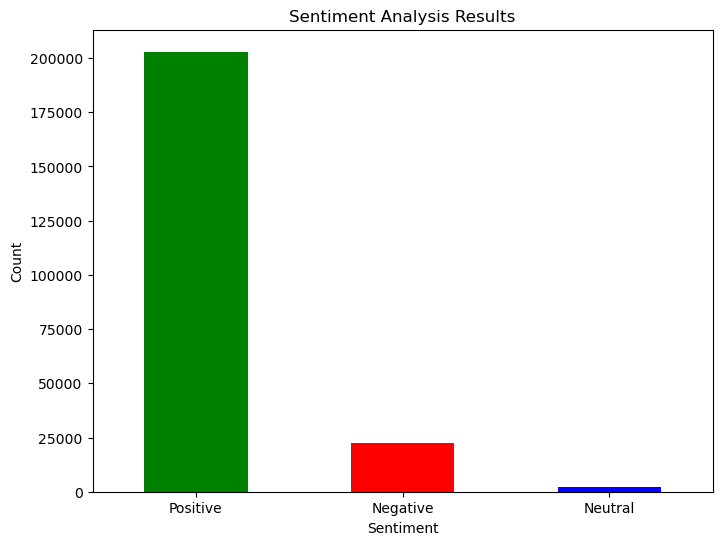

In [44]:
from textblob import TextBlob

def get_sentiment(text):
    if isinstance(text, str):  
        blob = TextBlob(text)
        return blob.sentiment.polarity
    return 0 

df['sentiment'] = df['Review_Text'].apply(get_sentiment)

def label_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(label_sentiment)


sentiment_counts = df['sentiment_label'].value_counts()


plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [45]:
sentiment_counts

sentiment_label
Positive    202869
Negative     22363
Neutral       2079
Name: count, dtype: int64